In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('titanic_dataset (1).csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# first identify the colmns that are not useful
# PassengerId - unique identifier for each passenger
df.drop(columns=['PassengerId'], inplace=True)

# Name - name of the passenger
df.drop(columns=['Name'], inplace=True)

# Ticket - ticket number information already can be inferred from cabin and pclass
df.drop(columns=['Ticket'], inplace=True)

# fare - fare paid for the ticket
df.drop(columns=['Fare'], inplace=True)

In [5]:
# check th columns again
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [6]:
# Check for missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# check the shape of the data ... to get the decision of cabin is droped or not
df.shape

(891, 8)

In [8]:
# check the precentage of missing values in the cabin column
cabin_precent = df['Cabin'].isnull().sum()/df.shape[0] * 100

# check the precentage of missing values in the Age column
age_precent = df['Age'].isnull().sum()/df.shape[0] * 100

print(f"Cabin missing values: {cabin_precent:.2f}%")
print(f"Age missing values: {age_precent:.2f}%")

Cabin missing values: 77.10%
Age missing values: 19.87%


In [9]:
# as the cabin column has more than 77% of missing values, we can drop it
df.drop(columns=['Cabin'], inplace=True)

In [12]:
# predict the missing values in the age column using the mean of the age column
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
# Check for missing values in the 'Age' column
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [16]:
# replace the missing values in the embarked column with the mode of the column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
# check still there any missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


Text(0.5, 1.0, 'Boxplot of Age')

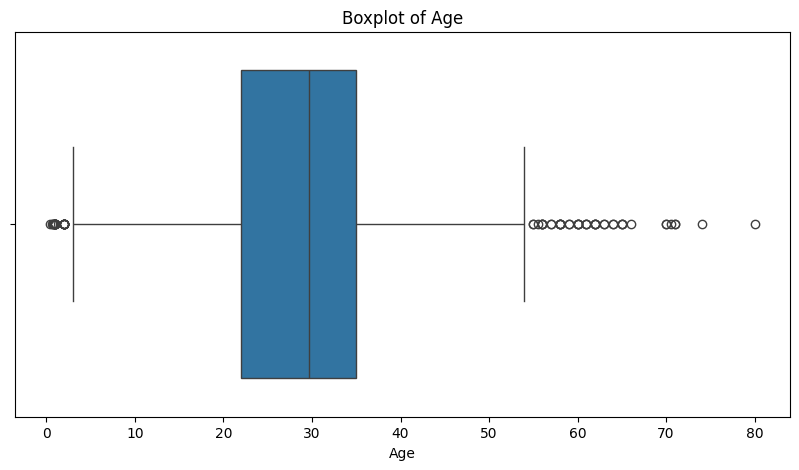

In [ ]:
# check the outliers in the age column
df['Age'].describe()
# check the outliers in the age column using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

In [23]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace values below lower_bound with lower_bound
df['Age'] = df['Age'].apply(lambda x: lower_bound if x < lower_bound else x)

# Replace values above upper_bound with upper_bound
df['Age'] = df['Age'].apply(lambda x: upper_bound if x > upper_bound else x)

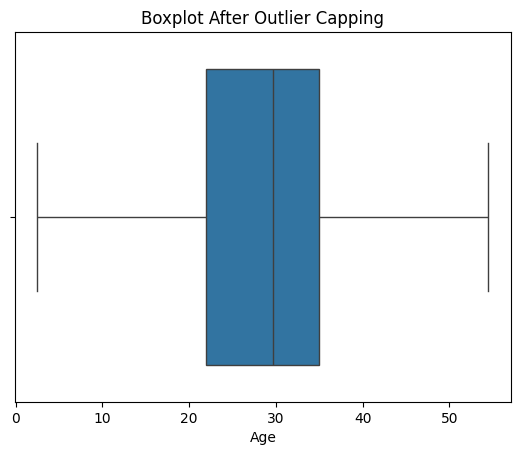

In [24]:
# check the outliers in the age column
sns.boxplot(x=df['Age'])
plt.title("Boxplot After Outlier Capping")
plt.show()

In [30]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [32]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [33]:
# check the duplicate values in the dataset
df.duplicated().sum()

np.int64(324)

In [35]:
# show the duplicated values in the dataset
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
32,1,3,female,29.699118,0,0,Q
42,0,3,male,29.699118,0,0,C
45,0,3,male,29.699118,0,0,S
47,1,3,female,29.699118,0,0,Q
51,0,3,male,21.000000,0,0,S
...,...,...,...,...,...,...,...
881,0,3,male,33.000000,0,0,S
882,0,3,female,22.000000,0,0,S
883,0,2,male,28.000000,0,0,S
884,0,3,male,25.000000,0,0,S


In [38]:
# encode the categorical columns using one hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
df_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [41]:
# Assuming you have a DataFrame `df` and you want to predict 'Survived'
X = df_encoded.drop(columns=['Survived'])  # Features
y = df_encoded['Survived']  # Target variable

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

Training data size: 712
Testing data size: 179


In [43]:
# Model Training and Evaluation

# logistic regression model
logregression = LogisticRegression()
logregression.fit(X, y)
y_pred = logregression.predict(X)


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Model: Random Forest
Accuracy: 0.83
Precision: 0.85
Recall: 0.72
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[96  9]
 [21 53]]


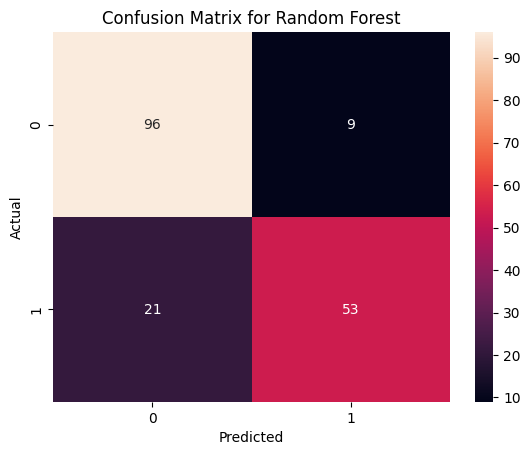

Model: Logistic Regression
Accuracy: 0.83
Precision: 0.85
Recall: 0.72
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[96  9]
 [21 53]]


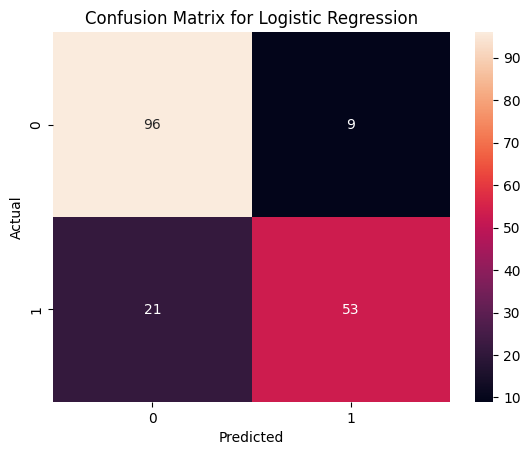

In [47]:
# elvaluate metrics
from sklearn.metrics import f1_score, precision_score, recall_score


def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precession = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precession:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate the Random Forest model
evaluate_model(y_test, y_pred, "Random Forest")

# Evaluate the Logistic Regression model
evaluate_model(y_test, y_pred, "Logistic Regression")


   

In [50]:
# cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

x = df_encoded.drop(columns=['Survived'])
# Features
X = df_encoded.drop(columns=['Survived'])
# Target variable
y = df['Survived']

model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(max_iter=1000, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for Random Forest
cv_rf = cross_val_score(model_rf, X, y, cv=kf, scoring='accuracy')
print("Random Forest Cross-validation Accuracy:")
print(cv_rf.mean())

# Cross-validation for Logistic Regression
cv_lr = cross_val_score(model_lr, X, y, cv=kf, scoring='accuracy')
print("Logistic Regression Cross-validation Accuracy:")
print(cv_lr.mean())


Random Forest Cross-validation Accuracy:
0.8091959073504489
Logistic Regression Cross-validation Accuracy:
0.7901450003138535
